In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import keras
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import gensim
from gensim import corpora,models,utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
import os
import random

Using TensorFlow backend.
C:\Users\Scott Sun\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# xml parsing
import xml.etree.ElementTree as ET

tree = ET.parse("./COLIEE2018_CaseLaw_Training_Data/Entailment1/EE.xml")
root = tree.getroot()
print(root.tag)

cases_noticed_list = []
for node in root.iter('entailing_paragraphs'):
    if node.text:
        cases_noticed_list.append(list(node.text.split(',')))
    else:
        cases_noticed_list.append([0])
# cases_noticed_list

COLIEE_2018


In [4]:
from collections import Counter
lenlist = []
for i in cases_noticed_list:
    lenlist.append(str(len(i)))
# print(Counter(lenlist))
c = Counter(lenlist)
c

Counter({'1': 141, '2': 27, '3': 10, '4': 2, '6': 1})

In [63]:
# c.values()

In [64]:
# Data Cleaning
target_articlef = open('./COLIEE2018_CaseLaw_Training_Data/IR/data/002/fact.txt')
target_article = target_articlef.read().replace('\n','').replace('[','').replace(']','')
candidate_article_list = []
for i in range(200):
    if i<10:
        index = '00'+str(i)
    elif i<100:
        index = '0'+str(i)
    else:
        index = str(i)
    candidate_articlef = open('./COLIEE2018_CaseLaw_Training_Data/IR/data/002/candidates/'+index+'.txt',encoding='utf-8')
    candidate_article = candidate_articlef.read().replace('\n','').replace('[','').replace(']','')
    candidate_article_list.append(candidate_article)
# len(candidate_article_list)

In [91]:
# type(target_article)


In [3]:
string_list = list(target_article)+candidate_article_list
count = CountVectorizer(min_df=0,ngram_range=(2,3),max_df = 0.03)#, stop_words='english')
count.fit(string_list)

NameError: name 'target_article' is not defined

In [93]:
def associ(sent,articles):
    count1 = count.transform(sent).todense()
    A = count.transform(articles).todense()
    B = np.matmul(count1,A.T).T
    C = np.sum(A, axis = 1) + np.sum(count1)
    D = B / C
    return (np.argsort(D, axis=0)[-25:])

In [94]:
associ([target_article],candidate_article_list)

matrix([[  8],
        [ 49],
        [187],
        [ 20],
        [ 92],
        [ 10],
        [  2],
        [ 27],
        [ 84],
        [154],
        [ 85],
        [163],
        [105],
        [ 74],
        [125],
        [142],
        [ 44],
        [ 98],
        [  9],
        [156],
        [ 36],
        [ 23],
        [130],
        [106],
        [ 43]], dtype=int64)

In [4]:
import os
import os.path
precision = []
recall = []
result = []
m=1
fsum = 0
for no in range(1,182):
        
        if no<10:
            nos = '00'+str(no)
        elif no<100:
            nos = '0'+str(no)
        else:
            nos = str(no)
        target_articlef = open('./COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/fact.txt',encoding='utf-8')
        target_article = target_articlef.read().replace('\n','').replace('[','').replace(']','')
        
        candidate_article_list = []
        
        path = 'C:/Users/Scott Sun/Desktop/yiluRA/law competation/COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/paragraphs/'
        files = os.listdir(path)
        fsum += len(files)
fsum

8794

In [4]:
# association rules - 2-gram
import os
import os.path
precision = []
recall = []
result = []
m=1
for no in range(1,192):
        
        if no<10:
            nos = '00'+str(no)
        elif no<100:
            nos = '0'+str(no)
        else:
            nos = str(no)
        target_articlef = open('./COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/fact.txt',encoding='utf-8')
        target_article = target_articlef.read().replace('\n','').replace('[','').replace(']','')
        
        candidate_article_list = []
        
        path = 'C:/Users/Scott Sun/Desktop/yiluRA/law competation/COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/paragraphs/'
        files = os.listdir(path)
        for index in files:
            candidate_articlef = open('./COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/paragraphs/'+index,encoding='utf-8')
            candidate_article = candidate_articlef.read().replace('\n','').replace('[','').replace(']','')
            candidate_article_list.append(candidate_article)
        
        string_list = list(target_article)+candidate_article_list
        count = CountVectorizer(min_df=0,ngram_range=(1,1))
        count.fit(string_list)
        
        count1 = count.transform([target_article]).todense()
        A = count.transform(candidate_article_list).todense()
        B = np.matmul(count1,A.T).T
        C = np.sum(A, axis = 1) + np.sum(count1)-B#减掉交集
        D = B / C
        
        result.append(np.argsort(D, axis=0)[-7:])
        print(m)
        m+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


C:\Users\Scott Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


FileNotFoundError: [Errno 2] No such file or directory: './COLIEE2018_CaseLaw_Training_Data/Entailment1/data/182/fact.txt'

In [125]:
for num in range(1,16):
    for j in range(len(result)):
        r = result[j][-num:]
        prtop = 0
        for re in r:
            print(str(re[0]).replace('[','').replace(']',''))
            print(re[0]+1)

90
[[91]]
43
[[44]]
9
[[10]]
161
[[162]]
27
[[28]]
58
[[59]]
1
[[2]]
170
[[171]]
197
[[198]]
126
[[127]]
187
[[188]]
85
[[86]]
162
[[163]]
80
[[81]]
119
[[120]]
71
[[72]]
62
[[63]]
116
[[117]]
199
[[200]]
143
[[144]]
14
[[15]]
177
[[178]]
180
[[181]]
24
[[25]]
155
[[156]]
105
[[106]]
3
[[4]]
13
[[14]]
52
[[53]]
106
[[107]]
192
[[193]]
45
[[46]]
15
[[16]]
51
[[52]]
197
[[198]]
179
[[180]]
16
[[17]]
189
[[190]]
195
[[196]]
92
[[93]]
129
[[130]]
192
[[193]]
68
[[69]]
5
[[6]]
63
[[64]]
22
[[23]]
127
[[128]]
8
[[9]]
39
[[40]]
18
[[19]]
13
[[14]]
63
[[64]]
51
[[52]]
149
[[150]]
57
[[58]]
138
[[139]]
53
[[54]]
50
[[51]]
128
[[129]]
101
[[102]]
120
[[121]]
151
[[152]]
42
[[43]]
73
[[74]]
56
[[57]]
46
[[47]]
117
[[118]]
95
[[96]]
59
[[60]]
31
[[32]]
4
[[5]]
1
[[2]]
112
[[113]]
1
[[2]]
14
[[15]]
185
[[186]]
91
[[92]]
23
[[24]]
18
[[19]]
173
[[174]]
52
[[53]]
70
[[71]]
34
[[35]]
150
[[151]]
3
[[4]]
169
[[170]]
11
[[12]]
30
[[31]]
37
[[38]]
114
[[115]]
6
[[7]]
165
[[166]]
26
[[27]]
191
[[192]]
71


59
[[60]]
127
[[128]]
158
[[159]]
95
[[96]]
184
[[185]]
143
[[144]]
98
[[99]]
167
[[168]]
11
[[12]]
12
[[13]]
83
[[84]]
30
[[31]]
195
[[196]]
90
[[91]]
130
[[131]]
106
[[107]]
43
[[44]]
199
[[200]]
182
[[183]]
9
[[10]]
118
[[119]]
140
[[141]]
161
[[162]]
184
[[185]]
146
[[147]]
27
[[28]]
141
[[142]]
92
[[93]]
58
[[59]]
196
[[197]]
56
[[57]]
1
[[2]]
63
[[64]]
43
[[44]]
170
[[171]]
199
[[200]]
72
[[73]]
197
[[198]]
3
[[4]]
23
[[24]]
126
[[127]]
33
[[34]]
103
[[104]]
187
[[188]]
63
[[64]]
142
[[143]]
85
[[86]]
4
[[5]]
3
[[4]]
162
[[163]]
32
[[33]]
41
[[42]]
80
[[81]]
121
[[122]]
46
[[47]]
119
[[120]]
143
[[144]]
65
[[66]]
71
[[72]]
8
[[9]]
184
[[185]]
62
[[63]]
157
[[158]]
85
[[86]]
116
[[117]]
107
[[108]]
5
[[6]]
199
[[200]]
31
[[32]]
148
[[149]]
143
[[144]]
115
[[116]]
150
[[151]]
14
[[15]]
30
[[31]]
42
[[43]]
177
[[178]]
92
[[93]]
29
[[30]]
180
[[181]]
44
[[45]]
175
[[176]]
24
[[25]]
104
[[105]]
14
[[15]]
155
[[156]]
29
[[30]]
93
[[94]]
105
[[106]]
31
[[32]]
58
[[59]]
3
[[4]]
52
[[53]]

80
[[81]]
27
[[28]]
67
[[68]]
51
[[52]]
43
[[44]]
126
[[127]]
48
[[49]]
197
[[198]]
76
[[77]]
32
[[33]]
193
[[194]]
179
[[180]]
149
[[150]]
54
[[55]]
98
[[99]]
16
[[17]]
101
[[102]]
59
[[60]]
28
[[29]]
189
[[190]]
131
[[132]]
17
[[18]]
96
[[97]]
195
[[196]]
154
[[155]]
158
[[159]]
35
[[36]]
92
[[93]]
87
[[88]]
166
[[167]]
98
[[99]]
129
[[130]]
180
[[181]]
104
[[105]]
183
[[184]]
192
[[193]]
22
[[23]]
88
[[89]]
10
[[11]]
68
[[69]]
124
[[125]]
95
[[96]]
83
[[84]]
5
[[6]]
65
[[66]]
10
[[11]]
1
[[2]]
63
[[64]]
62
[[63]]
91
[[92]]
92
[[93]]
22
[[23]]
187
[[188]]
8
[[9]]
153
[[154]]
127
[[128]]
29
[[30]]
115
[[116]]
170
[[171]]
8
[[9]]
27
[[28]]
91
[[92]]
133
[[134]]
39
[[40]]
192
[[193]]
51
[[52]]
110
[[111]]
18
[[19]]
72
[[73]]
82
[[83]]
165
[[166]]
13
[[14]]
77
[[78]]
31
[[32]]
111
[[112]]
63
[[64]]
170
[[171]]
187
[[188]]
100
[[101]]
51
[[52]]
162
[[163]]
82
[[83]]
67
[[68]]
149
[[150]]
23
[[24]]
130
[[131]]
2
[[3]]
57
[[58]]
145
[[146]]
91
[[92]]
101
[[102]]
138
[[139]]
77
[[78]]
112
[[

[[110]]
143
[[144]]
98
[[99]]
81
[[82]]
175
[[176]]
167
[[168]]
11
[[12]]
48
[[49]]
168
[[169]]
12
[[13]]
83
[[84]]
52
[[53]]
0
[[1]]
30
[[31]]
195
[[196]]
90
[[91]]
36
[[37]]
23
[[24]]
130
[[131]]
106
[[107]]
43
[[44]]
1
[[2]]
12
[[13]]
199
[[200]]
182
[[183]]
9
[[10]]
183
[[184]]
34
[[35]]
118
[[119]]
140
[[141]]
161
[[162]]
52
[[53]]
57
[[58]]
184
[[185]]
146
[[147]]
27
[[28]]
133
[[134]]
76
[[77]]
141
[[142]]
92
[[93]]
58
[[59]]
140
[[141]]
73
[[74]]
196
[[197]]
56
[[57]]
1
[[2]]
12
[[13]]
74
[[75]]
63
[[64]]
43
[[44]]
170
[[171]]
32
[[33]]
46
[[47]]
199
[[200]]
72
[[73]]
197
[[198]]
103
[[104]]
94
[[95]]
3
[[4]]
23
[[24]]
126
[[127]]
24
[[25]]
175
[[176]]
33
[[34]]
103
[[104]]
187
[[188]]
179
[[180]]
196
[[197]]
63
[[64]]
142
[[143]]
85
[[86]]
138
[[139]]
142
[[143]]
4
[[5]]
3
[[4]]
162
[[163]]
186
[[187]]
148
[[149]]
32
[[33]]
41
[[42]]
80
[[81]]
159
[[160]]
85
[[86]]
121
[[122]]
46
[[47]]
119
[[120]]
87
[[88]]
18
[[19]]
143
[[144]]
65
[[66]]
71
[[72]]
146
[[147]]
23
[[24]]
8
[[9

141
[[142]]
21
[[22]]
64
[[65]]
70
[[71]]
144
[[145]]
183
[[184]]
2
[[3]]
170
[[171]]
158
[[159]]
198
[[199]]
187
[[188]]
120
[[121]]
166
[[167]]
40
[[41]]
53
[[54]]
103
[[104]]
9
[[10]]
46
[[47]]
128
[[129]]
197
[[198]]
61
[[62]]
22
[[23]]
142
[[143]]
89
[[90]]
104
[[105]]
183
[[184]]
71
[[72]]
88
[[89]]
9
[[10]]
162
[[163]]
171
[[172]]
23
[[24]]
63
[[64]]
122
[[123]]
139
[[140]]
113
[[114]]
83
[[84]]
23
[[24]]
68
[[69]]
41
[[42]]
39
[[40]]
175
[[176]]
5
[[6]]
108
[[109]]
2
[[3]]
174
[[175]]
106
[[107]]
199
[[200]]
9
[[10]]
174
[[175]]
136
[[137]]
176
[[177]]
117
[[118]]
130
[[131]]
159
[[160]]
84
[[85]]
135
[[136]]
169
[[170]]
66
[[67]]
116
[[117]]
23
[[24]]
44
[[45]]
142
[[143]]
136
[[137]]
126
[[127]]
179
[[180]]
56
[[57]]
75
[[76]]
109
[[110]]
50
[[51]]
141
[[142]]
190
[[191]]
177
[[178]]
137
[[138]]
1
[[2]]
134
[[135]]
137
[[138]]
78
[[79]]
67
[[68]]
44
[[45]]
52
[[53]]
14
[[15]]
157
[[158]]
59
[[60]]
126
[[127]]
124
[[125]]
154
[[155]]
167
[[168]]
97
[[98]]
27
[[28]]
40
[[41]]
6

18
[[19]]
19
[[20]]
71
[[72]]
168
[[169]]
38
[[39]]
17
[[18]]
105
[[106]]
50
[[51]]
21
[[22]]
70
[[71]]
56
[[57]]
151
[[152]]
60
[[61]]
55
[[56]]
42
[[43]]
199
[[200]]
124
[[125]]
0
[[1]]
134
[[135]]
149
[[150]]
142
[[143]]
129
[[130]]
29
[[30]]
150
[[151]]
120
[[121]]
66
[[67]]
113
[[114]]
50
[[51]]
28
[[29]]
41
[[42]]
61
[[62]]
39
[[40]]
190
[[191]]
101
[[102]]
168
[[169]]
74
[[75]]
154
[[155]]
45
[[46]]
187
[[188]]
60
[[61]]
192
[[193]]
68
[[69]]
146
[[147]]
122
[[123]]
92
[[93]]
62
[[63]]
123
[[124]]
104
[[105]]
20
[[21]]
98
[[99]]
21
[[22]]
145
[[146]]
118
[[119]]
193
[[194]]
7
[[8]]
182
[[183]]
46
[[47]]
114
[[115]]
74
[[75]]
11
[[12]]
195
[[196]]
161
[[162]]
146
[[147]]
97
[[98]]
31
[[32]]
22
[[23]]
118
[[119]]
114
[[115]]
174
[[175]]
161
[[162]]
13
[[14]]
192
[[193]]
197
[[198]]
189
[[190]]
11
[[12]]
102
[[103]]
111
[[112]]
5
[[6]]
128
[[129]]
48
[[49]]
182
[[183]]
168
[[169]]
104
[[105]]
34
[[35]]
54
[[55]]
92
[[93]]
108
[[109]]
21
[[22]]
192
[[193]]
191
[[192]]
2
[[3]]
109
[[

[[120]]
187
[[188]]
24
[[25]]
81
[[82]]
112
[[113]]
118
[[119]]
84
[[85]]
4
[[5]]
142
[[143]]
66
[[67]]
17
[[18]]
95
[[96]]
44
[[45]]
45
[[46]]
15
[[16]]
130
[[131]]
50
[[51]]
53
[[54]]
70
[[71]]
117
[[118]]
140
[[141]]
179
[[180]]
71
[[72]]
62
[[63]]
16
[[17]]
26
[[27]]
117
[[118]]
90
[[91]]
29
[[30]]
17
[[18]]
85
[[86]]
9
[[10]]
50
[[51]]
61
[[62]]
95
[[96]]
158
[[159]]
144
[[145]]
157
[[158]]
93
[[94]]
163
[[164]]
123
[[124]]
93
[[94]]
130
[[131]]
34
[[35]]
46
[[47]]
164
[[165]]
80
[[81]]
11
[[12]]
183
[[184]]
25
[[26]]
49
[[50]]
55
[[56]]
139
[[140]]
94
[[95]]
184
[[185]]
107
[[108]]
38
[[39]]
85
[[86]]
43
[[44]]
114
[[115]]
119
[[120]]
71
[[72]]
149
[[150]]
94
[[95]]
93
[[94]]
64
[[65]]
148
[[149]]
36
[[37]]
145
[[146]]
167
[[168]]
108
[[109]]
113
[[114]]
4
[[5]]
1
[[2]]
101
[[102]]
196
[[197]]
42
[[43]]
76
[[77]]
183
[[184]]
117
[[118]]
26
[[27]]
22
[[23]]
72
[[73]]
85
[[86]]
172
[[173]]
197
[[198]]
146
[[147]]
77
[[78]]
49
[[50]]
47
[[48]]
181
[[182]]
93
[[94]]
66
[[67]]
101
[[1

165
[[166]]
47
[[48]]
192
[[193]]
177
[[178]]
1
[[2]]
129
[[130]]
14
[[15]]
188
[[189]]
69
[[70]]
87
[[88]]
163
[[164]]
66
[[67]]
147
[[148]]
56
[[57]]
19
[[20]]
122
[[123]]
30
[[31]]
73
[[74]]
127
[[128]]
88
[[89]]
175
[[176]]
16
[[17]]
74
[[75]]
29
[[30]]
77
[[78]]
132
[[133]]
16
[[17]]
43
[[44]]
133
[[134]]
119
[[120]]
179
[[180]]
14
[[15]]
57
[[58]]
137
[[138]]
30
[[31]]
54
[[55]]
134
[[135]]
17
[[18]]
169
[[170]]
147
[[148]]
85
[[86]]
29
[[30]]
64
[[65]]
69
[[70]]
27
[[28]]
148
[[149]]
42
[[43]]
23
[[24]]
81
[[82]]
172
[[173]]
54
[[55]]
184
[[185]]
25
[[26]]
80
[[81]]
73
[[74]]
45
[[46]]
66
[[67]]
38
[[39]]
144
[[145]]
78
[[79]]
155
[[156]]
84
[[85]]
76
[[77]]
67
[[68]]
179
[[180]]
77
[[78]]
10
[[11]]
96
[[97]]
141
[[142]]
173
[[174]]
148
[[149]]
160
[[161]]
195
[[196]]
20
[[21]]
109
[[110]]
189
[[190]]
144
[[145]]
152
[[153]]
77
[[78]]
158
[[159]]
142
[[143]]
120
[[121]]
14
[[15]]
98
[[99]]
33
[[34]]
194
[[195]]
141
[[142]]
43
[[44]]
23
[[24]]
58
[[59]]
21
[[22]]
141
[[142]]
55
[

62
[[63]]
16
[[17]]
26
[[27]]
117
[[118]]
97
[[98]]
90
[[91]]
29
[[30]]
17
[[18]]
85
[[86]]
9
[[10]]
50
[[51]]
150
[[151]]
61
[[62]]
95
[[96]]
158
[[159]]
144
[[145]]
157
[[158]]
93
[[94]]
26
[[27]]
163
[[164]]
123
[[124]]
93
[[94]]
130
[[131]]
34
[[35]]
46
[[47]]
77
[[78]]
164
[[165]]
80
[[81]]
11
[[12]]
183
[[184]]
25
[[26]]
49
[[50]]
122
[[123]]
55
[[56]]
139
[[140]]
94
[[95]]
184
[[185]]
107
[[108]]
38
[[39]]
135
[[136]]
85
[[86]]
43
[[44]]
114
[[115]]
119
[[120]]
71
[[72]]
149
[[150]]
24
[[25]]
94
[[95]]
93
[[94]]
64
[[65]]
148
[[149]]
36
[[37]]
145
[[146]]
126
[[127]]
167
[[168]]
108
[[109]]
113
[[114]]
4
[[5]]
1
[[2]]
101
[[102]]
52
[[53]]
196
[[197]]
42
[[43]]
76
[[77]]
183
[[184]]
117
[[118]]
26
[[27]]
73
[[74]]
22
[[23]]
72
[[73]]
85
[[86]]
172
[[173]]
197
[[198]]
146
[[147]]
116
[[117]]
77
[[78]]
49
[[50]]
47
[[48]]
181
[[182]]
93
[[94]]
66
[[67]]
103
[[104]]
101
[[102]]
20
[[21]]
153
[[154]]
120
[[121]]
179
[[180]]
68
[[69]]
142
[[143]]
177
[[178]]
45
[[46]]
110
[[111]]
128

[[168]]
102
[[103]]
111
[[112]]
5
[[6]]
128
[[129]]
48
[[49]]
182
[[183]]
115
[[116]]
76
[[77]]
168
[[169]]
104
[[105]]
34
[[35]]
54
[[55]]
92
[[93]]
108
[[109]]
196
[[197]]
153
[[154]]
21
[[22]]
192
[[193]]
191
[[192]]
2
[[3]]
109
[[110]]
68
[[69]]
124
[[125]]
128
[[129]]
145
[[146]]
54
[[55]]
191
[[192]]
31
[[32]]
194
[[195]]
189
[[190]]
118
[[119]]
117
[[118]]
37
[[38]]
188
[[189]]
146
[[147]]
178
[[179]]
141
[[142]]
107
[[108]]
116
[[117]]
154
[[155]]
187
[[188]]
41
[[42]]
138
[[139]]
87
[[88]]
44
[[45]]
167
[[168]]
112
[[113]]
155
[[156]]
49
[[50]]
9
[[10]]
130
[[131]]
71
[[72]]
182
[[183]]
66
[[67]]
111
[[112]]
60
[[61]]
157
[[158]]
172
[[173]]
99
[[100]]
52
[[53]]
73
[[74]]
177
[[178]]
112
[[113]]
147
[[148]]
21
[[22]]
74
[[75]]
157
[[158]]
85
[[86]]
5
[[6]]
161
[[162]]
192
[[193]]
124
[[125]]
58
[[59]]
89
[[90]]
198
[[199]]
113
[[114]]
116
[[117]]
17
[[18]]
140
[[141]]
105
[[106]]
68
[[69]]
69
[[70]]
23
[[24]]
11
[[12]]
142
[[143]]
7
[[8]]
172
[[173]]
28
[[29]]
115
[[116]]
31
[

91
[[92]]
29
[[30]]
21
[[22]]
186
[[187]]
44
[[45]]
41
[[42]]
118
[[119]]
162
[[163]]
1
[[2]]
15
[[16]]
86
[[87]]
134
[[135]]
59
[[60]]
9
[[10]]
6
[[7]]
25
[[26]]
129
[[130]]
81
[[82]]
172
[[173]]
149
[[150]]
147
[[148]]
92
[[93]]
90
[[91]]
50
[[51]]
2
[[3]]
83
[[84]]
52
[[53]]
30
[[31]]
75
[[76]]
31
[[32]]
8
[[9]]
63
[[64]]
130
[[131]]
106
[[107]]
95
[[96]]
4
[[5]]
6
[[7]]
193
[[194]]
16
[[17]]
114
[[115]]
175
[[176]]
68
[[69]]
89
[[90]]
131
[[132]]
184
[[185]]
15
[[16]]
68
[[69]]
156
[[157]]
107
[[108]]
161
[[162]]
119
[[120]]
120
[[121]]
7
[[8]]
3
[[4]]
155
[[156]]
40
[[41]]
73
[[74]]
145
[[146]]
105
[[106]]
4
[[5]]
167
[[168]]
103
[[104]]
76
[[77]]
170
[[171]]
194
[[195]]
106
[[107]]
16
[[17]]
98
[[99]]
72
[[73]]
143
[[144]]
6
[[7]]
47
[[48]]
84
[[85]]
4
[[5]]
11
[[12]]
1
[[2]]
54
[[55]]
20
[[21]]
129
[[130]]
162
[[163]]
57
[[58]]
100
[[101]]
19
[[20]]
115
[[116]]
22
[[23]]
153
[[154]]
82
[[83]]
126
[[127]]
30
[[31]]
179
[[180]]
34
[[35]]
75
[[76]]
68
[[69]]
8
[[9]]
179
[[180]]
24


[[70]]
145
[[146]]
170
[[171]]
14
[[15]]
21
[[22]]
36
[[37]]
73
[[74]]
84
[[85]]
113
[[114]]
64
[[65]]
173
[[174]]
87
[[88]]
89
[[90]]
121
[[122]]
183
[[184]]
56
[[57]]
28
[[29]]
100
[[101]]
114
[[115]]
112
[[113]]
66
[[67]]
15
[[16]]
138
[[139]]
22
[[23]]
46
[[47]]
78
[[79]]
162
[[163]]
5
[[6]]
65
[[66]]
101
[[102]]
99
[[100]]
107
[[108]]
56
[[57]]
117
[[118]]
4
[[5]]
93
[[94]]
100
[[101]]
169
[[170]]
109
[[110]]
86
[[87]]
141
[[142]]
119
[[120]]
95
[[96]]
116
[[117]]
42
[[43]]
144
[[145]]
81
[[82]]
79
[[80]]
15
[[16]]
136
[[137]]
117
[[118]]
59
[[60]]
127
[[128]]
101
[[102]]
168
[[169]]
88
[[89]]
112
[[113]]
26
[[27]]
113
[[114]]
30
[[31]]
31
[[32]]
124
[[125]]
43
[[44]]
60
[[61]]
135
[[136]]
54
[[55]]
164
[[165]]
73
[[74]]
63
[[64]]
4
[[5]]
187
[[188]]
195
[[196]]
136
[[137]]
178
[[179]]
75
[[76]]
194
[[195]]
11
[[12]]
57
[[58]]
1
[[2]]
132
[[133]]
31
[[32]]
97
[[98]]
93
[[94]]
164
[[165]]
22
[[23]]
175
[[176]]
94
[[95]]
112
[[113]]
109
[[110]]
94
[[95]]
131
[[132]]
4
[[5]]
86
[[87]

[[83]]
167
[[168]]
18
[[19]]
159
[[160]]
136
[[137]]
119
[[120]]
35
[[36]]
165
[[166]]
169
[[170]]
56
[[57]]
6
[[7]]
181
[[182]]
168
[[169]]
16
[[17]]
193
[[194]]
123
[[124]]
1
[[2]]
41
[[42]]
32
[[33]]
66
[[67]]
37
[[38]]
62
[[63]]
70
[[71]]
84
[[85]]
159
[[160]]
165
[[166]]
83
[[84]]
56
[[57]]
76
[[77]]
153
[[154]]
65
[[66]]
199
[[200]]
94
[[95]]
45
[[46]]
124
[[125]]
151
[[152]]
113
[[114]]
35
[[36]]
103
[[104]]
26
[[27]]
140
[[141]]
63
[[64]]
170
[[171]]
157
[[158]]
19
[[20]]
78
[[79]]
164
[[165]]
153
[[154]]
169
[[170]]
68
[[69]]
43
[[44]]
183
[[184]]
102
[[103]]
60
[[61]]
88
[[89]]
69
[[70]]
199
[[200]]
150
[[151]]
70
[[71]]
186
[[187]]
50
[[51]]
144
[[145]]
80
[[81]]
96
[[97]]
137
[[138]]
21
[[22]]
177
[[178]]
58
[[59]]
89
[[90]]
37
[[38]]
14
[[15]]
60
[[61]]
123
[[124]]
96
[[97]]
153
[[154]]
47
[[48]]
130
[[131]]
174
[[175]]
77
[[78]]
25
[[26]]
98
[[99]]
40
[[41]]
168
[[169]]
157
[[158]]
87
[[88]]
40
[[41]]
59
[[60]]
18
[[19]]
80
[[81]]
160
[[161]]
171
[[172]]
22
[[23]]
31
[[32

52
[[53]]
0
[[1]]
30
[[31]]
195
[[196]]
90
[[91]]
142
[[143]]
44
[[45]]
98
[[99]]
9
[[10]]
156
[[157]]
36
[[37]]
23
[[24]]
130
[[131]]
106
[[107]]
43
[[44]]
122
[[123]]
109
[[110]]
51
[[52]]
73
[[74]]
185
[[186]]
1
[[2]]
12
[[13]]
199
[[200]]
182
[[183]]
9
[[10]]
35
[[36]]
172
[[173]]
40
[[41]]
143
[[144]]
16
[[17]]
183
[[184]]
34
[[35]]
118
[[119]]
140
[[141]]
161
[[162]]
1
[[2]]
126
[[127]]
154
[[155]]
105
[[106]]
75
[[76]]
52
[[53]]
57
[[58]]
184
[[185]]
146
[[147]]
27
[[28]]
23
[[24]]
21
[[22]]
162
[[163]]
120
[[121]]
197
[[198]]
133
[[134]]
76
[[77]]
141
[[142]]
92
[[93]]
58
[[59]]
86
[[87]]
102
[[103]]
133
[[134]]
59
[[60]]
171
[[172]]
140
[[141]]
73
[[74]]
196
[[197]]
56
[[57]]
1
[[2]]
174
[[175]]
18
[[19]]
147
[[148]]
39
[[40]]
169
[[170]]
12
[[13]]
74
[[75]]
63
[[64]]
43
[[44]]
170
[[171]]
192
[[193]]
111
[[112]]
26
[[27]]
184
[[185]]
156
[[157]]
32
[[33]]
46
[[47]]
199
[[200]]
72
[[73]]
197
[[198]]
67
[[68]]
168
[[169]]
120
[[121]]
188
[[189]]
178
[[179]]
103
[[104]]
94
[[95]

30
[[31]]
74
[[75]]
186
[[187]]
60
[[61]]
192
[[193]]
68
[[69]]
146
[[147]]
122
[[123]]
92
[[93]]
124
[[125]]
31
[[32]]
146
[[147]]
25
[[26]]
62
[[63]]
123
[[124]]
104
[[105]]
20
[[21]]
98
[[99]]
21
[[22]]
52
[[53]]
97
[[98]]
180
[[181]]
163
[[164]]
145
[[146]]
118
[[119]]
193
[[194]]
7
[[8]]
182
[[183]]
46
[[47]]
82
[[83]]
29
[[30]]
37
[[38]]
125
[[126]]
114
[[115]]
74
[[75]]
11
[[12]]
195
[[196]]
161
[[162]]
146
[[147]]
110
[[111]]
104
[[105]]
177
[[178]]
88
[[89]]
97
[[98]]
31
[[32]]
22
[[23]]
118
[[119]]
114
[[115]]
174
[[175]]
80
[[81]]
64
[[65]]
59
[[60]]
131
[[132]]
161
[[162]]
13
[[14]]
192
[[193]]
197
[[198]]
189
[[190]]
11
[[12]]
45
[[46]]
66
[[67]]
148
[[149]]
167
[[168]]
102
[[103]]
111
[[112]]
5
[[6]]
128
[[129]]
48
[[49]]
182
[[183]]
91
[[92]]
109
[[110]]
115
[[116]]
76
[[77]]
168
[[169]]
104
[[105]]
34
[[35]]
54
[[55]]
92
[[93]]
108
[[109]]
144
[[145]]
86
[[87]]
196
[[197]]
153
[[154]]
21
[[22]]
192
[[193]]
191
[[192]]
2
[[3]]
109
[[110]]
68
[[69]]
8
[[9]]
121
[[122]]
12

[[104]]
147
[[148]]
137
[[138]]
4
[[5]]
71
[[72]]
51
[[52]]
9
[[10]]
46
[[47]]
128
[[129]]
197
[[198]]
61
[[62]]
103
[[104]]
116
[[117]]
114
[[115]]
181
[[182]]
117
[[118]]
22
[[23]]
142
[[143]]
89
[[90]]
104
[[105]]
183
[[184]]
18
[[19]]
28
[[29]]
160
[[161]]
179
[[180]]
126
[[127]]
71
[[72]]
88
[[89]]
9
[[10]]
162
[[163]]
171
[[172]]
106
[[107]]
184
[[185]]
181
[[182]]
47
[[48]]
144
[[145]]
23
[[24]]
63
[[64]]
122
[[123]]
139
[[140]]
113
[[114]]
193
[[194]]
50
[[51]]
141
[[142]]
104
[[105]]
61
[[62]]
83
[[84]]
23
[[24]]
68
[[69]]
41
[[42]]
39
[[40]]
88
[[89]]
109
[[110]]
10
[[11]]
160
[[161]]
34
[[35]]
175
[[176]]
5
[[6]]
108
[[109]]
2
[[3]]
174
[[175]]
80
[[81]]
10
[[11]]
68
[[69]]
189
[[190]]
67
[[68]]
106
[[107]]
199
[[200]]
9
[[10]]
174
[[175]]
136
[[137]]
195
[[196]]
184
[[185]]
99
[[100]]
70
[[71]]
33
[[34]]
176
[[177]]
117
[[118]]
130
[[131]]
159
[[160]]
84
[[85]]
84
[[85]]
54
[[55]]
55
[[56]]
96
[[97]]
27
[[28]]
135
[[136]]
169
[[170]]
66
[[67]]
116
[[117]]
23
[[24]]
169
[[17

[[122]]
46
[[47]]
119
[[120]]
157
[[158]]
93
[[94]]
150
[[151]]
11
[[12]]
180
[[181]]
49
[[50]]
87
[[88]]
18
[[19]]
143
[[144]]
65
[[66]]
71
[[72]]
149
[[150]]
195
[[196]]
147
[[148]]
10
[[11]]
194
[[195]]
31
[[32]]
146
[[147]]
23
[[24]]
8
[[9]]
184
[[185]]
62
[[63]]
63
[[64]]
65
[[66]]
122
[[123]]
158
[[159]]
198
[[199]]
143
[[144]]
22
[[23]]
54
[[55]]
157
[[158]]
85
[[86]]
116
[[117]]
47
[[48]]
19
[[20]]
157
[[158]]
60
[[61]]
100
[[101]]
98
[[99]]
59
[[60]]
79
[[80]]
107
[[108]]
5
[[6]]
199
[[200]]
140
[[141]]
169
[[170]]
150
[[151]]
54
[[55]]
170
[[171]]
56
[[57]]
126
[[127]]
102
[[103]]
31
[[32]]
148
[[149]]
143
[[144]]
21
[[22]]
108
[[109]]
53
[[54]]
164
[[165]]
170
[[171]]
116
[[117]]
35
[[36]]
179
[[180]]
115
[[116]]
150
[[151]]
14
[[15]]
16
[[17]]
13
[[14]]
140
[[141]]
169
[[170]]
86
[[87]]
172
[[173]]
112
[[113]]
24
[[25]]
30
[[31]]
42
[[43]]
177
[[178]]
142
[[143]]
155
[[156]]
139
[[140]]
130
[[131]]
8
[[9]]
176
[[177]]
44
[[45]]
32
[[33]]
92
[[93]]
29
[[30]]
180
[[181]]
91
[

[[98]]
31
[[32]]
22
[[23]]
118
[[119]]
114
[[115]]
174
[[175]]
47
[[48]]
80
[[81]]
64
[[65]]
59
[[60]]
131
[[132]]
161
[[162]]
13
[[14]]
192
[[193]]
197
[[198]]
189
[[190]]
11
[[12]]
155
[[156]]
45
[[46]]
66
[[67]]
148
[[149]]
167
[[168]]
102
[[103]]
111
[[112]]
5
[[6]]
128
[[129]]
48
[[49]]
182
[[183]]
112
[[113]]
91
[[92]]
109
[[110]]
115
[[116]]
76
[[77]]
168
[[169]]
104
[[105]]
34
[[35]]
54
[[55]]
92
[[93]]
108
[[109]]
75
[[76]]
144
[[145]]
86
[[87]]
196
[[197]]
153
[[154]]
21
[[22]]
192
[[193]]
191
[[192]]
2
[[3]]
109
[[110]]
68
[[69]]
146
[[147]]
8
[[9]]
121
[[122]]
124
[[125]]
128
[[129]]
145
[[146]]
54
[[55]]
191
[[192]]
31
[[32]]
194
[[195]]
189
[[190]]
159
[[160]]
186
[[187]]
137
[[138]]
118
[[119]]
117
[[118]]
37
[[38]]
188
[[189]]
146
[[147]]
178
[[179]]
141
[[142]]
107
[[108]]
50
[[51]]
64
[[65]]
42
[[43]]
116
[[117]]
154
[[155]]
187
[[188]]
41
[[42]]
138
[[139]]
87
[[88]]
44
[[45]]
167
[[168]]
198
[[199]]
94
[[95]]
189
[[190]]
112
[[113]]
155
[[156]]
49
[[50]]
9
[[10]]
13

[[72]]
118
[[119]]
147
[[148]]
9
[[10]]
91
[[92]]
28
[[29]]
120
[[121]]
84
[[85]]
36
[[37]]
53
[[54]]
176
[[177]]
72
[[73]]
113
[[114]]
6
[[7]]
178
[[179]]
140
[[141]]
81
[[82]]
150
[[151]]
79
[[80]]
67
[[68]]
163
[[164]]
74
[[75]]
105
[[106]]
141
[[142]]
97
[[98]]
63
[[64]]
175
[[176]]
194
[[195]]
182
[[183]]
75
[[76]]
21
[[22]]
64
[[65]]
70
[[71]]
144
[[145]]
183
[[184]]
38
[[39]]
190
[[191]]
183
[[184]]
51
[[52]]
195
[[196]]
11
[[12]]
2
[[3]]
170
[[171]]
158
[[159]]
198
[[199]]
187
[[188]]
17
[[18]]
105
[[106]]
187
[[188]]
147
[[148]]
167
[[168]]
140
[[141]]
120
[[121]]
166
[[167]]
40
[[41]]
53
[[54]]
103
[[104]]
70
[[71]]
147
[[148]]
137
[[138]]
4
[[5]]
71
[[72]]
51
[[52]]
9
[[10]]
46
[[47]]
128
[[129]]
197
[[198]]
61
[[62]]
147
[[148]]
103
[[104]]
116
[[117]]
114
[[115]]
181
[[182]]
117
[[118]]
22
[[23]]
142
[[143]]
89
[[90]]
104
[[105]]
183
[[184]]
41
[[42]]
18
[[19]]
28
[[29]]
160
[[161]]
179
[[180]]
126
[[127]]
71
[[72]]
88
[[89]]
9
[[10]]
162
[[163]]
171
[[172]]
163
[[164]]
10

[[130]]
3
[[4]]
122
[[123]]
109
[[110]]
51
[[52]]
73
[[74]]
185
[[186]]
1
[[2]]
12
[[13]]
199
[[200]]
182
[[183]]
9
[[10]]
116
[[117]]
33
[[34]]
35
[[36]]
172
[[173]]
40
[[41]]
143
[[144]]
16
[[17]]
183
[[184]]
34
[[35]]
118
[[119]]
140
[[141]]
161
[[162]]
77
[[78]]
141
[[142]]
1
[[2]]
126
[[127]]
154
[[155]]
105
[[106]]
75
[[76]]
52
[[53]]
57
[[58]]
184
[[185]]
146
[[147]]
27
[[28]]
29
[[30]]
188
[[189]]
23
[[24]]
21
[[22]]
162
[[163]]
120
[[121]]
197
[[198]]
133
[[134]]
76
[[77]]
141
[[142]]
92
[[93]]
58
[[59]]
151
[[152]]
55
[[56]]
86
[[87]]
102
[[103]]
133
[[134]]
59
[[60]]
171
[[172]]
140
[[141]]
73
[[74]]
196
[[197]]
56
[[57]]
1
[[2]]
45
[[46]]
168
[[169]]
174
[[175]]
18
[[19]]
147
[[148]]
39
[[40]]
169
[[170]]
12
[[13]]
74
[[75]]
63
[[64]]
43
[[44]]
170
[[171]]
40
[[41]]
127
[[128]]
192
[[193]]
111
[[112]]
26
[[27]]
184
[[185]]
156
[[157]]
32
[[33]]
46
[[47]]
199
[[200]]
72
[[73]]
197
[[198]]
159
[[160]]
74
[[75]]
67
[[68]]
168
[[169]]
120
[[121]]
188
[[189]]
178
[[179]]
103
[[1

[[164]]
43
[[44]]
116
[[117]]
134
[[135]]
90
[[91]]
79
[[80]]
135
[[136]]
172
[[173]]
113
[[114]]
142
[[143]]
169
[[170]]
65
[[66]]
7
[[8]]
160
[[161]]
132
[[133]]
58
[[59]]
40
[[41]]
64
[[65]]
117
[[118]]
189
[[190]]
87
[[88]]
84
[[85]]
11
[[12]]
127
[[128]]
106
[[107]]
196
[[197]]
4
[[5]]
154
[[155]]
186
[[187]]
190
[[191]]
31
[[32]]
148
[[149]]
162
[[163]]
3
[[4]]
30
[[31]]
78
[[79]]
50
[[51]]
98
[[99]]
27
[[28]]
159
[[160]]
167
[[168]]
69
[[70]]
76
[[77]]
10
[[11]]
81
[[82]]
45
[[46]]
37
[[38]]
180
[[181]]
96
[[97]]
26
[[27]]
15
[[16]]
169
[[170]]
77
[[78]]
190
[[191]]
173
[[174]]
53
[[54]]
110
[[111]]
79
[[80]]
114
[[115]]
22
[[23]]
97
[[98]]
150
[[151]]
16
[[17]]
14
[[15]]
86
[[87]]
82
[[83]]
198
[[199]]
195
[[196]]
1
[[2]]
19
[[20]]
6
[[7]]
112
[[113]]
187
[[188]]
79
[[80]]
157
[[158]]
123
[[124]]
120
[[121]]
69
[[70]]
164
[[165]]
184
[[185]]
149
[[150]]
62
[[63]]
165
[[166]]
47
[[48]]
55
[[56]]
37
[[38]]
164
[[165]]
53
[[54]]
191
[[192]]
12
[[13]]
64
[[65]]
96
[[97]]
162
[[163]

[[55]]
116
[[117]]
101
[[102]]
180
[[181]]
152
[[153]]
180
[[181]]
0
[[1]]
187
[[188]]
65
[[66]]
101
[[102]]
34
[[35]]
6
[[7]]
12
[[13]]
117
[[118]]
113
[[114]]
121
[[122]]
186
[[187]]
144
[[145]]
35
[[36]]
116
[[117]]
134
[[135]]
92
[[93]]
65
[[66]]
18
[[19]]
64
[[65]]
25
[[26]]
125
[[126]]
149
[[150]]
29
[[30]]
66
[[67]]
159
[[160]]
116
[[117]]
71
[[72]]
8
[[9]]
40
[[41]]
34
[[35]]
154
[[155]]
148
[[149]]
25
[[26]]
108
[[109]]
143
[[144]]
197
[[198]]
165
[[166]]
108
[[109]]
194
[[195]]
128
[[129]]
24
[[25]]
20
[[21]]
105
[[106]]
39
[[40]]
124
[[125]]
191
[[192]]
84
[[85]]
61
[[62]]
124
[[125]]
196
[[197]]
187
[[188]]
117
[[118]]
175
[[176]]
168
[[169]]
89
[[90]]
1
[[2]]
162
[[163]]
173
[[174]]
148
[[149]]
4
[[5]]
141
[[142]]
162
[[163]]
60
[[61]]
18
[[19]]
169
[[170]]
177
[[178]]
83
[[84]]
23
[[24]]
196
[[197]]
125
[[126]]
139
[[140]]
123
[[124]]
35
[[36]]
196
[[197]]
178
[[179]]
59
[[60]]
198
[[199]]
113
[[114]]
125
[[126]]
94
[[95]]
87
[[88]]
56
[[57]]
82
[[83]]
111
[[112]]
63
[[64

17
[[18]]
37
[[38]]
25
[[26]]
106
[[107]]
17
[[18]]
104
[[105]]
142
[[143]]
3
[[4]]
159
[[160]]
81
[[82]]
158
[[159]]
86
[[87]]
90
[[91]]
62
[[63]]
55
[[56]]
151
[[152]]
6
[[7]]
66
[[67]]
166
[[167]]
46
[[47]]
10
[[11]]
68
[[69]]
64
[[65]]
43
[[44]]
15
[[16]]
14
[[15]]
134
[[135]]
35
[[36]]
2
[[3]]
186
[[187]]
7
[[8]]
121
[[122]]
157
[[158]]
185
[[186]]
34
[[35]]
40
[[41]]
114
[[115]]
73
[[74]]
4
[[5]]
147
[[148]]
73
[[74]]
181
[[182]]
86
[[87]]
131
[[132]]
150
[[151]]
192
[[193]]
60
[[61]]
160
[[161]]
77
[[78]]
175
[[176]]
130
[[131]]
93
[[94]]
166
[[167]]
30
[[31]]
12
[[13]]
92
[[93]]
176
[[177]]
11
[[12]]
43
[[44]]
75
[[76]]
128
[[129]]
7
[[8]]
67
[[68]]
1
[[2]]
65
[[66]]
34
[[35]]
171
[[172]]
4
[[5]]
193
[[194]]
199
[[200]]
114
[[115]]
17
[[18]]
73
[[74]]
46
[[47]]
0
[[1]]
180
[[181]]
194
[[195]]
168
[[169]]
132
[[133]]
139
[[140]]
3
[[4]]
188
[[189]]
187
[[188]]
75
[[76]]
135
[[136]]
47
[[48]]
198
[[199]]
70
[[71]]
67
[[68]]
125
[[126]]
38
[[39]]
31
[[32]]
92
[[93]]
30
[[31]]
144


76
[[77]]
143
[[144]]
63
[[64]]
136
[[137]]
152
[[153]]
101
[[102]]
173
[[174]]
18
[[19]]
187
[[188]]
8
[[9]]
153
[[154]]
127
[[128]]
96
[[97]]
60
[[61]]
179
[[180]]
87
[[88]]
188
[[189]]
169
[[170]]
7
[[8]]
35
[[36]]
89
[[90]]
29
[[30]]
115
[[116]]
170
[[171]]
8
[[9]]
47
[[48]]
149
[[150]]
44
[[45]]
146
[[147]]
17
[[18]]
188
[[189]]
177
[[178]]
114
[[115]]
13
[[14]]
27
[[28]]
91
[[92]]
133
[[134]]
39
[[40]]
38
[[39]]
158
[[159]]
136
[[137]]
111
[[112]]
174
[[175]]
105
[[106]]
154
[[155]]
46
[[47]]
60
[[61]]
192
[[193]]
51
[[52]]
110
[[111]]
18
[[19]]
21
[[22]]
126
[[127]]
183
[[184]]
22
[[23]]
110
[[111]]
132
[[133]]
97
[[98]]
12
[[13]]
90
[[91]]
72
[[73]]
82
[[83]]
165
[[166]]
13
[[14]]
56
[[57]]
95
[[96]]
186
[[187]]
113
[[114]]
70
[[71]]
59
[[60]]
167
[[168]]
82
[[83]]
40
[[41]]
77
[[78]]
31
[[32]]
111
[[112]]
63
[[64]]
26
[[27]]
84
[[85]]
74
[[75]]
73
[[74]]
89
[[90]]
119
[[120]]
58
[[59]]
174
[[175]]
48
[[49]]
170
[[171]]
187
[[188]]
100
[[101]]
51
[[52]]
106
[[107]]
141
[[142]]


111
[[112]]
178
[[179]]
191
[[192]]
166
[[167]]
38
[[39]]
86
[[87]]
129
[[130]]
14
[[15]]
188
[[189]]
69
[[70]]
87
[[88]]
163
[[164]]
66
[[67]]
132
[[133]]
86
[[87]]
44
[[45]]
77
[[78]]
138
[[139]]
152
[[153]]
147
[[148]]
56
[[57]]
19
[[20]]
122
[[123]]
30
[[31]]
73
[[74]]
127
[[128]]
49
[[50]]
44
[[45]]
12
[[13]]
117
[[118]]
126
[[127]]
94
[[95]]
88
[[89]]
175
[[176]]
16
[[17]]
74
[[75]]
29
[[30]]
77
[[78]]
132
[[133]]
52
[[53]]
107
[[108]]
145
[[146]]
122
[[123]]
152
[[153]]
4
[[5]]
16
[[17]]
43
[[44]]
133
[[134]]
119
[[120]]
179
[[180]]
14
[[15]]
57
[[58]]
18
[[19]]
9
[[10]]
76
[[77]]
23
[[24]]
63
[[64]]
37
[[38]]
137
[[138]]
30
[[31]]
54
[[55]]
134
[[135]]
17
[[18]]
169
[[170]]
147
[[148]]
99
[[100]]
43
[[44]]
112
[[113]]
58
[[59]]
153
[[154]]
82
[[83]]
85
[[86]]
29
[[30]]
64
[[65]]
69
[[70]]
27
[[28]]
148
[[149]]
42
[[43]]
47
[[48]]
131
[[132]]
192
[[193]]
182
[[183]]
44
[[45]]
52
[[53]]
23
[[24]]
81
[[82]]
172
[[173]]
54
[[55]]
184
[[185]]
25
[[26]]
80
[[81]]
25
[[26]]
178
[[179]

[[114]]
1
[[2]]
17
[[18]]
105
[[106]]
187
[[188]]
147
[[148]]
167
[[168]]
140
[[141]]
120
[[121]]
166
[[167]]
40
[[41]]
53
[[54]]
103
[[104]]
117
[[118]]
62
[[63]]
70
[[71]]
147
[[148]]
137
[[138]]
4
[[5]]
71
[[72]]
51
[[52]]
9
[[10]]
46
[[47]]
128
[[129]]
197
[[198]]
61
[[62]]
14
[[15]]
188
[[189]]
147
[[148]]
103
[[104]]
116
[[117]]
114
[[115]]
181
[[182]]
117
[[118]]
22
[[23]]
142
[[143]]
89
[[90]]
104
[[105]]
183
[[184]]
80
[[81]]
146
[[147]]
41
[[42]]
18
[[19]]
28
[[29]]
160
[[161]]
179
[[180]]
126
[[127]]
71
[[72]]
88
[[89]]
9
[[10]]
162
[[163]]
171
[[172]]
91
[[92]]
42
[[43]]
163
[[164]]
106
[[107]]
184
[[185]]
181
[[182]]
47
[[48]]
144
[[145]]
23
[[24]]
63
[[64]]
122
[[123]]
139
[[140]]
113
[[114]]
166
[[167]]
128
[[129]]
70
[[71]]
193
[[194]]
50
[[51]]
141
[[142]]
104
[[105]]
61
[[62]]
83
[[84]]
23
[[24]]
68
[[69]]
41
[[42]]
39
[[40]]
67
[[68]]
121
[[122]]
142
[[143]]
88
[[89]]
109
[[110]]
10
[[11]]
160
[[161]]
34
[[35]]
175
[[176]]
5
[[6]]
108
[[109]]
2
[[3]]
174
[[175]]
141


179
[[180]]
68
[[69]]
127
[[128]]
18
[[19]]
102
[[103]]
181
[[182]]
46
[[47]]
120
[[121]]
142
[[143]]
177
[[178]]
45
[[46]]
110
[[111]]
128
[[129]]
21
[[22]]
149
[[150]]
199
[[200]]
118
[[119]]
69
[[70]]
97
[[98]]
101
[[102]]
161
[[162]]
25
[[26]]
33
[[34]]
94
[[95]]
63
[[64]]
13
[[14]]
84
[[85]]
34
[[35]]
110
[[111]]
152
[[153]]
154
[[155]]
170
[[171]]
70
[[71]]
76
[[77]]
148
[[149]]
2
[[3]]
188
[[189]]
91
[[92]]
168
[[169]]
149
[[150]]
59
[[60]]
128
[[129]]
138
[[139]]
104
[[105]]
149
[[150]]
4
[[5]]
70
[[71]]
30
[[31]]
141
[[142]]
69
[[70]]
187
[[188]]
6
[[7]]
127
[[128]]
158
[[159]]
96
[[97]]
12
[[13]]
187
[[188]]
7
[[8]]
150
[[151]]
179
[[180]]
146
[[147]]
122
[[123]]
14
[[15]]
9
[[10]]
168
[[169]]
95
[[96]]
184
[[185]]
75
[[76]]
175
[[176]]
18
[[19]]
67
[[68]]
40
[[41]]
55
[[56]]
120
[[121]]
59
[[60]]
155
[[156]]
81
[[82]]
109
[[110]]
143
[[144]]
98
[[99]]
180
[[181]]
199
[[200]]
69
[[70]]
181
[[182]]
146
[[147]]
17
[[18]]
160
[[161]]
51
[[52]]
62
[[63]]
81
[[82]]
175
[[176]]
167

[[171]]
14
[[15]]
21
[[22]]
36
[[37]]
73
[[74]]
67
[[68]]
114
[[115]]
82
[[83]]
93
[[94]]
54
[[55]]
84
[[85]]
113
[[114]]
64
[[65]]
173
[[174]]
87
[[88]]
89
[[90]]
121
[[122]]
183
[[184]]
56
[[57]]
78
[[79]]
32
[[33]]
120
[[121]]
142
[[143]]
167
[[168]]
28
[[29]]
100
[[101]]
114
[[115]]
112
[[113]]
66
[[67]]
15
[[16]]
138
[[139]]
22
[[23]]
46
[[47]]
13
[[14]]
94
[[95]]
40
[[41]]
27
[[28]]
182
[[183]]
78
[[79]]
162
[[163]]
5
[[6]]
65
[[66]]
101
[[102]]
99
[[100]]
107
[[108]]
56
[[57]]
117
[[118]]
162
[[163]]
45
[[46]]
94
[[95]]
78
[[79]]
117
[[118]]
4
[[5]]
93
[[94]]
100
[[101]]
169
[[170]]
109
[[110]]
86
[[87]]
141
[[142]]
119
[[120]]
95
[[96]]
0
[[1]]
196
[[197]]
150
[[151]]
9
[[10]]
109
[[110]]
116
[[117]]
42
[[43]]
144
[[145]]
81
[[82]]
79
[[80]]
15
[[16]]
136
[[137]]
117
[[118]]
59
[[60]]
129
[[130]]
102
[[103]]
65
[[66]]
7
[[8]]
38
[[39]]
127
[[128]]
101
[[102]]
168
[[169]]
88
[[89]]
112
[[113]]
26
[[27]]
113
[[114]]
30
[[31]]
31
[[32]]
125
[[126]]
42
[[43]]
82
[[83]]
150
[[151]]


58
[[59]]
21
[[22]]
141
[[142]]
55
[[56]]
61
[[62]]
19
[[20]]
40
[[41]]
108
[[109]]
106
[[107]]
121
[[122]]
109
[[110]]
50
[[51]]
120
[[121]]
179
[[180]]
99
[[100]]
102
[[103]]
73
[[74]]
89
[[90]]
134
[[135]]
68
[[69]]
130
[[131]]
176
[[177]]
105
[[106]]
147
[[148]]
61
[[62]]
0
[[1]]
97
[[98]]
33
[[34]]
57
[[58]]
69
[[70]]
127
[[128]]
188
[[189]]
48
[[49]]
77
[[78]]
37
[[38]]
65
[[66]]
185
[[186]]
82
[[83]]
44
[[45]]
117
[[118]]
111
[[112]]
131
[[132]]
46
[[47]]
84
[[85]]
166
[[167]]
66
[[67]]
127
[[128]]
62
[[63]]
130
[[131]]
189
[[190]]
168
[[169]]
164
[[165]]
37
[[38]]
42
[[43]]
195
[[196]]
111
[[112]]
99
[[100]]
78
[[79]]
69
[[70]]
43
[[44]]
101
[[102]]
113
[[114]]
181
[[182]]
39
[[40]]
128
[[129]]
183
[[184]]
62
[[63]]
49
[[50]]
45
[[46]]
1
[[2]]
74
[[75]]
107
[[108]]
169
[[170]]
158
[[159]]
126
[[127]]
187
[[188]]
199
[[200]]
145
[[146]]
23
[[24]]
177
[[178]]
186
[[187]]
1
[[2]]
129
[[130]]
99
[[100]]
196
[[197]]
126
[[127]]
93
[[94]]
96
[[97]]
79
[[80]]
51
[[52]]
115
[[116]]
64


10
[[11]]
160
[[161]]
34
[[35]]
175
[[176]]
5
[[6]]
108
[[109]]
2
[[3]]
174
[[175]]
177
[[178]]
141
[[142]]
121
[[122]]
25
[[26]]
80
[[81]]
10
[[11]]
68
[[69]]
189
[[190]]
67
[[68]]
106
[[107]]
199
[[200]]
9
[[10]]
174
[[175]]
136
[[137]]
121
[[122]]
150
[[151]]
196
[[197]]
173
[[174]]
195
[[196]]
184
[[185]]
99
[[100]]
70
[[71]]
33
[[34]]
176
[[177]]
117
[[118]]
130
[[131]]
159
[[160]]
84
[[85]]
158
[[159]]
90
[[91]]
64
[[65]]
4
[[5]]
84
[[85]]
54
[[55]]
55
[[56]]
96
[[97]]
27
[[28]]
135
[[136]]
169
[[170]]
66
[[67]]
116
[[117]]
23
[[24]]
137
[[138]]
50
[[51]]
10
[[11]]
195
[[196]]
169
[[170]]
187
[[188]]
180
[[181]]
14
[[15]]
25
[[26]]
44
[[45]]
142
[[143]]
136
[[137]]
126
[[127]]
179
[[180]]
83
[[84]]
149
[[150]]
176
[[177]]
114
[[115]]
8
[[9]]
113
[[114]]
137
[[138]]
28
[[29]]
170
[[171]]
56
[[57]]
75
[[76]]
109
[[110]]
50
[[51]]
141
[[142]]
12
[[13]]
52
[[53]]
72
[[73]]
186
[[187]]
174
[[175]]
21
[[22]]
121
[[122]]
197
[[198]]
111
[[112]]
190
[[191]]
177
[[178]]
137
[[138]]
1
[[2]

[[119]]
69
[[70]]
97
[[98]]
101
[[102]]
161
[[162]]
25
[[26]]
33
[[34]]
94
[[95]]
63
[[64]]
13
[[14]]
84
[[85]]
34
[[35]]
28
[[29]]
110
[[111]]
152
[[153]]
154
[[155]]
170
[[171]]
70
[[71]]
76
[[77]]
148
[[149]]
2
[[3]]
188
[[189]]
91
[[92]]
168
[[169]]
149
[[150]]
59
[[60]]
58
[[59]]
128
[[129]]
138
[[139]]
104
[[105]]
149
[[150]]
4
[[5]]
70
[[71]]
30
[[31]]
141
[[142]]
69
[[70]]
187
[[188]]
6
[[7]]
127
[[128]]
158
[[159]]
0
[[1]]
96
[[97]]
12
[[13]]
187
[[188]]
7
[[8]]
150
[[151]]
179
[[180]]
146
[[147]]
122
[[123]]
14
[[15]]
9
[[10]]
168
[[169]]
95
[[96]]
184
[[185]]
144
[[145]]
75
[[76]]
175
[[176]]
18
[[19]]
67
[[68]]
40
[[41]]
55
[[56]]
120
[[121]]
59
[[60]]
155
[[156]]
81
[[82]]
109
[[110]]
143
[[144]]
98
[[99]]
20
[[21]]
180
[[181]]
199
[[200]]
69
[[70]]
181
[[182]]
146
[[147]]
17
[[18]]
160
[[161]]
51
[[52]]
62
[[63]]
81
[[82]]
175
[[176]]
167
[[168]]
11
[[12]]
34
[[35]]
82
[[83]]
64
[[65]]
153
[[154]]
115
[[116]]
18
[[19]]
54
[[55]]
7
[[8]]
45
[[46]]
157
[[158]]
48
[[49]]
168

101
[[102]]
198
[[199]]
12
[[13]]
121
[[122]]
105
[[106]]
188
[[189]]
97
[[98]]
176
[[177]]
91
[[92]]
80
[[81]]
31
[[32]]
39
[[40]]
126
[[127]]
186
[[187]]
62
[[63]]
120
[[121]]
145
[[146]]
27
[[28]]
129
[[130]]
81
[[82]]
52
[[53]]
13
[[14]]
120
[[121]]
43
[[44]]
50
[[51]]
174
[[175]]
95
[[96]]
139
[[140]]
65
[[66]]
14
[[15]]
151
[[152]]
129
[[130]]
163
[[164]]
79
[[80]]
150
[[151]]
31
[[32]]
102
[[103]]
35
[[36]]
27
[[28]]
84
[[85]]
142
[[143]]
136
[[137]]
179
[[180]]
189
[[190]]
128
[[129]]
42
[[43]]
4
[[5]]
97
[[98]]
166
[[167]]
12
[[13]]
131
[[132]]
2
[[3]]
48
[[49]]
19
[[20]]
69
[[70]]
145
[[146]]
170
[[171]]
14
[[15]]
21
[[22]]
36
[[37]]
73
[[74]]
166
[[167]]
67
[[68]]
114
[[115]]
82
[[83]]
93
[[94]]
54
[[55]]
84
[[85]]
113
[[114]]
64
[[65]]
173
[[174]]
87
[[88]]
89
[[90]]
121
[[122]]
183
[[184]]
56
[[57]]
137
[[138]]
78
[[79]]
32
[[33]]
120
[[121]]
142
[[143]]
167
[[168]]
28
[[29]]
100
[[101]]
114
[[115]]
112
[[113]]
66
[[67]]
15
[[16]]
138
[[139]]
22
[[23]]
46
[[47]]
161
[[162]

107
[[108]]
145
[[146]]
122
[[123]]
152
[[153]]
4
[[5]]
16
[[17]]
43
[[44]]
133
[[134]]
119
[[120]]
179
[[180]]
14
[[15]]
57
[[58]]
104
[[105]]
154
[[155]]
18
[[19]]
9
[[10]]
76
[[77]]
23
[[24]]
63
[[64]]
37
[[38]]
137
[[138]]
30
[[31]]
54
[[55]]
134
[[135]]
17
[[18]]
169
[[170]]
147
[[148]]
78
[[79]]
125
[[126]]
99
[[100]]
43
[[44]]
112
[[113]]
58
[[59]]
153
[[154]]
82
[[83]]
85
[[86]]
29
[[30]]
64
[[65]]
69
[[70]]
27
[[28]]
148
[[149]]
42
[[43]]
113
[[114]]
161
[[162]]
47
[[48]]
131
[[132]]
192
[[193]]
182
[[183]]
44
[[45]]
52
[[53]]
23
[[24]]
81
[[82]]
172
[[173]]
54
[[55]]
184
[[185]]
25
[[26]]
80
[[81]]
97
[[98]]
19
[[20]]
25
[[26]]
178
[[179]]
149
[[150]]
95
[[96]]
109
[[110]]
165
[[166]]
73
[[74]]
45
[[46]]
66
[[67]]
38
[[39]]
144
[[145]]
78
[[79]]
155
[[156]]
137
[[138]]
16
[[17]]
13
[[14]]
187
[[188]]
151
[[152]]
122
[[123]]
74
[[75]]
1
[[2]]
84
[[85]]
76
[[77]]
67
[[68]]
179
[[180]]
77
[[78]]
10
[[11]]
96
[[97]]
122
[[123]]
139
[[140]]
144
[[145]]
128
[[129]]
36
[[37]]
23
[[2

173
[[174]]
108
[[109]]
175
[[176]]
70
[[71]]
45
[[46]]
153
[[154]]
118
[[119]]
180
[[181]]
73
[[74]]
179
[[180]]
61
[[62]]
18
[[19]]
71
[[72]]
197
[[198]]
90
[[91]]
58
[[59]]
163
[[164]]
139
[[140]]
117
[[118]]
99
[[100]]
91
[[92]]
186
[[187]]
90
[[91]]
132
[[133]]
111
[[112]]
9
[[10]]
33
[[34]]
102
[[103]]
47
[[48]]
6
[[7]]
185
[[186]]
97
[[98]]
198
[[199]]
163
[[164]]
10
[[11]]
134
[[135]]
151
[[152]]
104
[[105]]
1
[[2]]
83
[[84]]
173
[[174]]
177
[[178]]
54
[[55]]
139
[[140]]
10
[[11]]
106
[[107]]
37
[[38]]
108
[[109]]
71
[[72]]
118
[[119]]
157
[[158]]
58
[[59]]
128
[[129]]
22
[[23]]
147
[[148]]
9
[[10]]
91
[[92]]
28
[[29]]
120
[[121]]
84
[[85]]
36
[[37]]
53
[[54]]
176
[[177]]
72
[[73]]
113
[[114]]
152
[[153]]
123
[[124]]
155
[[156]]
91
[[92]]
6
[[7]]
178
[[179]]
140
[[141]]
81
[[82]]
150
[[151]]
79
[[80]]
67
[[68]]
163
[[164]]
74
[[75]]
105
[[106]]
141
[[142]]
172
[[173]]
120
[[121]]
122
[[123]]
166
[[167]]
97
[[98]]
63
[[64]]
175
[[176]]
194
[[195]]
182
[[183]]
75
[[76]]
21
[[22]]

[[53]]
95
[[96]]
71
[[72]]
59
[[60]]
179
[[180]]
104
[[105]]
178
[[179]]
131
[[132]]
162
[[163]]
157
[[158]]
133
[[134]]
164
[[165]]
125
[[126]]
96
[[97]]
135
[[136]]
167
[[168]]
52
[[53]]
58
[[59]]
191
[[192]]
32
[[33]]
0
[[1]]
142
[[143]]
144
[[145]]
174
[[175]]
51
[[52]]
48
[[49]]
10
[[11]]
63
[[64]]
28
[[29]]
70
[[71]]
126
[[127]]
17
[[18]]
37
[[38]]
25
[[26]]
83
[[84]]
96
[[97]]
4
[[5]]
106
[[107]]
17
[[18]]
104
[[105]]
142
[[143]]
3
[[4]]
159
[[160]]
81
[[82]]
158
[[159]]
86
[[87]]
90
[[91]]
62
[[63]]
55
[[56]]
62
[[63]]
96
[[97]]
179
[[180]]
151
[[152]]
6
[[7]]
66
[[67]]
166
[[167]]
46
[[47]]
10
[[11]]
68
[[69]]
64
[[65]]
43
[[44]]
15
[[16]]
14
[[15]]
134
[[135]]
98
[[99]]
166
[[167]]
86
[[87]]
35
[[36]]
2
[[3]]
186
[[187]]
7
[[8]]
121
[[122]]
157
[[158]]
185
[[186]]
34
[[35]]
40
[[41]]
114
[[115]]
73
[[74]]
4
[[5]]
14
[[15]]
186
[[187]]
92
[[93]]
147
[[148]]
73
[[74]]
181
[[182]]
86
[[87]]
131
[[132]]
150
[[151]]
192
[[193]]
60
[[61]]
160
[[161]]
77
[[78]]
175
[[176]]
130
[[131

In [212]:
# for i in result:
#     print(min(i))
text_file = open("Task2_smartlaw.txt", "w")
for no in range(43):
    for i in range(4):
        text_file.write('t2-'+str(no+1)+' '+str(result[no][i,0])+' smartlaw\n')
text_file.close()

In [6]:
precision = []
recall = []
p=[]
r1 = []
f2=[]
for num in range(1,15):
    precision = []
    recall = []
    for j in range(len(result)):
        r = result[j][-num:]
        prtop = 0
        for re in r:
            if str(re[0]).replace('[','').replace(']','') in cases_noticed_list[j]:
                prtop+=1
        precision.append(prtop)
        recall.append(len(cases_noticed_list[j]))
    
    pre = 0.0
    rec = 0.0
    for i in range(len(precision)):
        pre+= precision[i]/num
        rec+= precision[i]/recall[i]
        
    pre = pre/181
    rec = rec/181
    F2 = 2*pre*rec/(pre+rec)
    p.append(pre)
    r1.append(rec)
    f2.append(F2)
    print('num of prediction: ',num)
    print('precision: ',pre)
    print('recall: ',rec)
    print('F2-measure: ',F2)

num of prediction:  1
precision:  0.0718232044198895
recall:  0.06767955801104972
F2-measure:  0.06968984191236803
num of prediction:  2
precision:  0.058011049723756904
recall:  0.1054327808471455
F2-measure:  0.07484242471403005
num of prediction:  3
precision:  0.06077348066298344
recall:  0.15791896869244937
F2-measure:  0.08776970049432976
num of prediction:  4
precision:  0.06077348066298342
recall:  0.20257826887661146
F2-measure:  0.09349766255843604
num of prediction:  5
precision:  0.057458563535911576
recall:  0.23388581952117862
F2-measure:  0.0922533194571526
num of prediction:  6
precision:  0.05709023941068137
recall:  0.27992633517495397
F2-measure:  0.09483843049643245
num of prediction:  7
precision:  0.056037884767166535
recall:  0.31491712707182323
F2-measure:  0.0951451745621253
num of prediction:  8
precision:  0.04903314917127072
recall:  0.31491712707182323
F2-measure:  0.08485433025464686
num of prediction:  9
precision:  0.0435850214855739
recall:  0.314917127

In [18]:
len(recall)

191

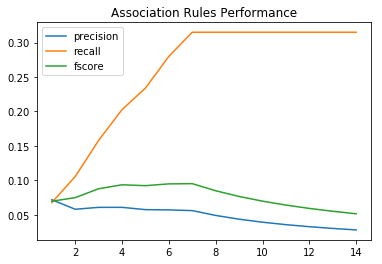

In [8]:
import matplotlib.pyplot as plt
x = range(1,15)
plt.plot(x,p,label='precision')
plt.plot(x,r1,label='recall')
plt.plot(x,f2,label='fscore')
plt.title('Association Rules Performance')
plt.legend(loc=2)
plt.show()

In [9]:
d = pd.DataFrame(p)
d['recall'] = r1
d['F2-measure'] = f2
d.to_csv('Task2_result.csv')

word2vec

In [3]:
target_article_list=[]
candidate_article_list_l=[]
paranum = []
for no in range(1,182):
        
        if no<10:
            nos = '00'+str(no)
        elif no<100:
            nos = '0'+str(no)
        else:
            nos = str(no)
        target_articlef = open('./COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/fact.txt',encoding='utf-8')
        target_article = target_articlef.read().replace('\n','').replace('[','').replace(']','')
        target_article_list.append(target_article)
        
        candidate_article_list = []
        path = 'C:/Users/Scott Sun/Desktop/yiluRA/law competation/COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/paragraphs/'
        files = os.listdir(path)
        n=0
        for index in files:
            candidate_articlef = open('./COLIEE2018_CaseLaw_Training_Data/Entailment1/data/'+nos+'/paragraphs/'+index,encoding='utf-8')
            candidate_article = candidate_articlef.read().replace('\n','').replace('[','').replace(']','')
            candidate_article_list.append(candidate_article)
            n+=1
        paranum.append(n)
        candidate_article_list_l.append(candidate_article_list)

In [30]:
# paranum

In [4]:
model_doc = Doc2Vec(vector_size=50, min_count=5, epochs=55)

In [5]:
# target_train_list=[]
# tn=1
# for ta in target_article_list:
#     target_train_list.append(models.doc2vec.TaggedDocument(utils.simple_preprocess(ta), 'target'+str(tn)))
#     tn+=1
# can_train_list=[]
# casen = 1
# for candidate_article_list in candidate_article_list_l:
#     cn = 0
#     for candidate_article in candidate_article_list:
#         can_train_list.extend(models.doc2vec.TaggedDocument(utils.simple_preprocess(candidate_article), 'case'+str(casen)+'candidate'+str(cn)))
#         cn+=1
#     casen+=1
#     print(casen)

In [6]:
def read_corpus_target(tokens_only=False):
    for index, content in zip(range(1,182),target_article_list):
            if tokens_only:
                yield utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield models.doc2vec.TaggedDocument(utils.simple_preprocess(content), 'target'+str(index))

In [7]:
def read_corpus_candidate(tokens_only=False):
    for i in range(0,181):
        for index, content in zip(range(1,300),candidate_article_list_l[i]):
            if tokens_only:
                yield utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield models.doc2vec.TaggedDocument(utils.simple_preprocess(content), 'case'+str(i)+'candidate'+str(index))

In [8]:
target_train_list2 = list(read_corpus_target(tokens_only=False))
can_train_list2 = list(read_corpus_candidate(tokens_only=False))

In [9]:
train_list = target_train_list2+can_train_list2

In [10]:
model_doc.build_vocab(train_list)

In [11]:
%time model_doc.train(train_list, total_examples=model_doc.corpus_count, epochs=model_doc.epochs)

Wall time: 2min 53s


In [12]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("task2_doc2vec_model")
model_doc.save(fname)

In [13]:
# train_list[0]

In [14]:
vectors1 = dict()
for i in train_list:
    name = i[1]
    vectors1[name]=model_doc.infer_vector(i[0])

In [15]:
data = pd.DataFrame.from_dict(vectors1).transpose()
data.shape

(8975, 50)

In [16]:
# sum1=0
# for i in paranum:
#     sum1+=i
# sum1
# len(can_train_list2)
# data.loc['target1',:].values
# a = range(1,100)
# data
# paranum[177]
# cases_noticed_list[136]
# for i in data.index:
#     print(i)

In [19]:
#split
rem = random.sample(range(181),54)
# rem

In [149]:
#training
import random
pred = []
dataset = dict()
score = []
for index in range(len(cases_noticed_list)):
    if index in rem:
        print(index)
        continue
    n=1
    case = 'target'+str(index+1)
    seq = []
    for i in range(1,paranum[index]+1):
        seq.append(str(i))
    for rpa in cases_noticed_list[index]:
        rpa = rpa.replace(' ','')
#         print(rpa)
        seq.remove(rpa)
        para = 'case'+str(index) + 'candidate'+rpa
        temp = data.loc[case,:].tolist()
        for i in data.loc[para,:].tolist():
            temp.append(i)
        dataset[case+str(n)]=temp
        n+=1
        pred.append(1)
        
        count1 = count.transform([target_article_list[index]]).todense()
        A = count.transform([candidate_article_list_l[index][int(rpa)-1]]).todense()
        B = np.matmul(count1,A.T).T
        C = np.sum(A, axis = 1) + np.sum(count1)
        D = B / C
        score.append(D[0,0])
    candi = random.sample(seq,len(cases_noticed_list[index]))
    for num in candi:
        para = 'case'+str(index) + 'candidate'+num
        temp = data.loc[case,:].tolist()
        for i in data.loc[para,:].tolist():
            temp.append(i)
        dataset[case+str(n)]=temp
        n+=1
        pred.append(0)
        
        count1 = count.transform([target_article_list[index]]).todense()
        A = count.transform([candidate_article_list_l[index][int(num)-1]]).todense()
        B = np.matmul(count1,A.T).T
        C = np.sum(A, axis = 1) + np.sum(count1)
        D = B / C
        score.append(D[0,0])
#     print(index)

10
14
15
16
18
26
30
36
37
38
39
43
46
48
53
55
56
61
62
70
74
80
81
83
88
89
92
95
98
101
106
109
115
118
119
121
135
136
141
142
143
144
145
146
147
151
153
154
155
168
169
175
177
179


In [97]:
# score[5][0,0]
# score

In [140]:
#testing
score_test = []
dataset_test = dict()
for index in range(len(cases_noticed_list)):
    if index not in rem:
#         print(index)
        continue
    n=1
    case = 'target'+str(index+1)
    temp = data.loc[case,:].tolist()
    for rpa in range(len(candidate_article_list_l[index])):
        temp = data.loc[case,:].tolist()
        para = 'case'+str(index) + 'candidate'+str(rpa+1)
        for i in data.loc[para,:].tolist():
            temp.append(i)
        dataset_test[case+str(n)]=temp
        n+=1
        
        count1 = count.transform([target_article_list[index]]).todense()
        A = count.transform([candidate_article_list_l[index][rpa]]).todense()
        B = np.matmul(count1,A.T).T
        C = np.sum(A, axis = 1) + np.sum(count1)
        D = B / C
        score_test.append(D[0,0])

In [150]:
data2 = pd.DataFrame.from_dict(dataset).transpose()
data2['score'] = score
data2.to_csv('data2_1.csv')
data3 = pd.DataFrame.from_dict(dataset_test).transpose()
data3['score'] = score_test
data3.to_csv('data3_1.csv')

In [151]:
train_x = data2.values
test_x = data3.values

In [31]:
# data2['target']=pred
# data2

random forest

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=100)
rf.fit(train_x,pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [160]:
result_rf = []
for index in range(len(cases_noticed_list)):
    result_t=[]
    if index not in rem:
#         print(index)
        continue
    case = 'target'+str(index+1)
    for rpa in range(len(candidate_article_list_l[index])):
        temp = data.loc[case,:].tolist()
        para = 'case'+str(index) + 'candidate'+str(rpa+1)
        for i in data.loc[para,:].tolist():
            temp.append(i)
#         print(rf.predict_proba([temp])[0][0])

        string_l = [target_article_list[index]+candidate_article_list_l[index][rpa]]
        count = CountVectorizer(min_df=0,ngram_range=(2,3))
        count.fit(string_l)
        count1 = count.transform([target_article_list[index]]).todense()
        A = count.transform([candidate_article_list_l[index][rpa]]).todense()
        B = np.matmul(count1,A.T).T
        C = np.sum(A, axis = 1) + np.sum(count1)-B
        D = B / C
        temp.append(D[0,0])
        result_t.append(rf.predict_proba([temp])[0][0])
    result_rf.append(np.argsort(result_t))


In [165]:
# result_rf[0]
# cases_noticed_list[14]
# target_article_list[15]
candidate_article_list_l[15][0]

"1 Pratte, J.A. orally: This is an appeal from an order of the Trial Division setting aside a decision of the Minister of National Revenue denying the respondents' request under s. 152(4.2) of the Income Tax Act see footnote 1 to re-open statute barred taxation years to enable them to claim business losses that they had allegedly incurred in those years."

In [166]:
result_rf[2]

array([6, 0, 7, 2, 1, 4, 8, 5, 3], dtype=int64)

In [213]:
for num in range(1,31):
    precision = []
    recall = []
    for j in range(len(result_rf)):
        r = result_rf[j][-num:]
        prtop = 0
        for re in r:
            if str(re+1) in cases_noticed_list[rem[j]]:
                prtop+=1
        precision.append(prtop)
        recall.append(len(cases_noticed_list[rem[j]]))
    
    pre = 0.0
    rec = 0.0
    for i in range(len(precision)):
        pre+= precision[i]/num
        rec+= precision[i]/recall[i]
        
    pre = pre/181
    rec = rec/181
    F2 = 5*pre*rec/(4*pre+rec)
    
    print('num of prediction: ',num)
    print('precision: ',pre)
    print('recall: ',rec)
    print('F2-measure: ',F2)

num of prediction:  1
precision:  0.0055248618784530384
recall:  0.0027624309392265192
F2-measure:  0.0030693677102516877
num of prediction:  2
precision:  0.011049723756906077
recall:  0.016574585635359115
F2-measure:  0.015067805123053741
num of prediction:  3
precision:  0.012891344383057089
recall:  0.027624309392265192
F2-measure:  0.022484902993704224
num of prediction:  4
precision:  0.012430939226519336
recall:  0.03591160220994475
F2-measure:  0.02606487257173409
num of prediction:  5
precision:  0.011049723756906077
recall:  0.03867403314917127
F2-measure:  0.02578268876611418
num of prediction:  6
precision:  0.009208103130755065
recall:  0.03867403314917127
F2-measure:  0.023581727529982485
num of prediction:  7
precision:  0.009471191791633778
recall:  0.049723756906077346
F2-measure:  0.02687770643571748
num of prediction:  8
precision:  0.008287292817679558
recall:  0.049723756906077346
F2-measure:  0.02486187845303867
num of prediction:  9
precision:  0.0073664825046040

In [ ]:
count1 = count.transform(sent).todense()
A = count.transform(articles).todense()
B = np.matmul(count1,A.T).T
C = np.sum(A, axis = 1) + np.sum(count1)
D = B / C

In [170]:
for num in range(1,31):
    precision = []
    recall = []
    for j in range(len(result_rf)):
        r = result_rf[j][-num:]
        prtop = 0
        for re in r:
            if str(re+1) in cases_noticed_list[rem[j]]:
                prtop+=1
        precision.append(prtop)
        recall.append(len(cases_noticed_list[rem[j]]))
    
    pre = 0.0
    rec = 0.0
    for i in range(len(precision)):
        pre+= precision[i]/num
        rec+= precision[i]/recall[i]
        
    pre = pre/286
    rec = rec/286
    F2 = 5*pre*rec/(4*pre+rec)
    
    print('num of prediction: ',num)
    print('precision: ',pre)
    print('recall: ',rec)
    print('F2-measure: ',F2)

num of prediction:  1
precision:  0.0034965034965034965
recall:  0.0017482517482517483
F2-measure:  0.0019425019425019425
num of prediction:  2
precision:  0.006993006993006993
recall:  0.01048951048951049
F2-measure:  0.009535918626827717
num of prediction:  3
precision:  0.008158508158508158
recall:  0.017482517482517484
F2-measure:  0.014229956090421209
num of prediction:  4
precision:  0.007867132867132868
recall:  0.022727272727272728
F2-measure:  0.016495601173020527
num of prediction:  5
precision:  0.006993006993006992
recall:  0.024475524475524476
F2-measure:  0.016317016317016316
num of prediction:  6
precision:  0.005827505827505828
recall:  0.024475524475524476
F2-measure:  0.014924100289953947
num of prediction:  7
precision:  0.005994005994005992
recall:  0.03146853146853147
F2-measure:  0.017010017010017007
num of prediction:  8
precision:  0.005244755244755245
recall:  0.03146853146853147
F2-measure:  0.015734265734265736
num of prediction:  9
precision:  0.004662004662

In [175]:
#nltk
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
text = ''
for i in range(len(cases_noticed_list)):
    for index in cases_noticed_list[i]:
        text+=candidate_article_list_l[i][int(index)-1]


In [197]:
text_other = ''
for i in range(len(cases_noticed_list)):
    for index in range(len(candidate_article_list_l[i])):
        if str(index+1) not in cases_noticed_list[i]:
            text_other+=candidate_article_list_l[i][int(index)-1]

In [199]:
# lancaster = nltk.LancasterStemmer()
tokens = nltk.word_tokenize(text_other)
words = [word.lower() for word in tokens if word.isalpha()]
# stem2 = [lancaster.stem(w) for w in words]
words2 = [word for word in words if word not in stopwords]

words2 = [word for word in words2 if len(word)>2]
fDist2 = nltk.FreqDist(words2)
sorted_fDist3 = sorted(fDist2.items(),key = lambda k:k[1], reverse = True)
sorted_fDist3

[('court', 4480),
 ('canada', 3717),
 ('act', 3392),
 ('decision', 3206),
 ('would', 3172),
 ('case', 2683),
 ('board', 2667),
 ('applicant', 2549),
 ('appeal', 2516),
 ('may', 2469),
 ('evidence', 2325),
 ('law', 2325),
 ('review', 2038),
 ('minister', 2024),
 ('application', 1894),
 ('whether', 1834),
 ('must', 1770),
 ('one', 1697),
 ('made', 1663),
 ('immigration', 1577),
 ('commission', 1567),
 ('question', 1543),
 ('also', 1512),
 ('section', 1450),
 ('person', 1449),
 ('order', 1411),
 ('officer', 1354),
 ('issue', 1296),
 ('reasons', 1271),
 ('canadian', 1242),
 ('appellant', 1242),
 ('federal', 1221),
 ('see', 1217),
 ('tribunal', 1213),
 ('however', 1163),
 ('judicial', 1140),
 ('right', 1133),
 ('fact', 1126),
 ('within', 1107),
 ('time', 1106),
 ('des', 1097),
 ('respect', 1085),
 ('could', 1069),
 ('rights', 1061),
 ('respondent', 1052),
 ('justice', 1036),
 ('view', 1029),
 ('les', 1015),
 ('para', 1014),
 ('judge', 1006),
 ('jurisdiction', 984),
 ('reasonable', 958),
 ('

In [200]:
# candidate_article_list_l[0][0]
# lancaster = nltk.LancasterStemmer()
tokens = nltk.word_tokenize(text)
words = [word.lower() for word in tokens if word.isalpha()]
# stem2 = [lancaster.stem(w) for w in words]
words2 = [word for word in words if word not in stopwords]

words2 = [word for word in words2 if len(word)>2]
fDist2 = nltk.FreqDist(words2)
sorted_fDist2 = sorted(fDist2.items(),key = lambda k:k[1], reverse = True)
sorted_fDist2

[('court', 115),
 ('evidence', 108),
 ('canada', 104),
 ('applicant', 102),
 ('would', 99),
 ('decision', 85),
 ('act', 82),
 ('case', 79),
 ('officer', 79),
 ('board', 75),
 ('points', 65),
 ('whether', 64),
 ('appeal', 59),
 ('application', 59),
 ('immigration', 57),
 ('appellant', 56),
 ('review', 54),
 ('made', 50),
 ('visa', 50),
 ('des', 50),
 ('one', 48),
 ('person', 46),
 ('must', 45),
 ('may', 44),
 ('les', 43),
 ('university', 43),
 ('respect', 41),
 ('minister', 41),
 ('issue', 40),
 ('judicial', 40),
 ('que', 40),
 ('law', 39),
 ('order', 38),
 ('justice', 38),
 ('also', 38),
 ('hanif', 38),
 ('time', 37),
 ('commission', 37),
 ('respondent', 37),
 ('educational', 36),
 ('subsection', 35),
 ('refugee', 35),
 ('pas', 35),
 ('section', 34),
 ('however', 33),
 ('judge', 32),
 ('plaintiff', 31),
 ('basis', 31),
 ('could', 31),
 ('upon', 31),
 ('par', 31),
 ('view', 30),
 ('discretion', 30),
 ('reasons', 29),
 ('within', 29),
 ('without', 29),
 ('question', 28),
 ('said', 28),
 

In [192]:
dic1 = []
for i in sorted_fDist2:
    if i[1]>=36:
        dic.append(i[0])
dic1

['thi',
 'canad',
 'court',
 'appl',
 'act',
 'decid',
 'hav',
 'evid',
 'cas',
 'would',
 'apply',
 'board',
 'consid',
 'point',
 'requir',
 'bas',
 'commit',
 'wer',
 'person',
 'review',
 'issu',
 'stat',
 'claim',
 'fact',
 'cred',
 'wheth',
 'und',
 'ther',
 'appel',
 'reason',
 'conclud',
 'immigr',
 'educ',
 'employ',
 'provid',
 'oth',
 'find',
 'ord',
 'par',
 'determin',
 'respect',
 'thes',
 'mad',
 'vis',
 'judg',
 'min',
 'des',
 'mat',
 'respond',
 'memb',
 'must',
 'may',
 'bef',
 'quest',
 'nat',
 'wil',
 'les',
 'law',
 'univers',
 'process',
 'tim',
 'jud',
 'paragraph',
 'work',
 'que',
 'spec',
 'giv',
 'also',
 'doe',
 'serv',
 'resid',
 'han',
 'plaintiff',
 'est',
 'right',
 'reg',
 'subsect',
 'follow',
 'refug',
 'discret',
 'com',
 'study']

In [194]:
result = []
for index in range(len(cases_noticed_list)):
    re = []
    for rpa in range(len(candidate_article_list_l[index])):
        tokens = nltk.word_tokenize(candidate_article_list_l[index][rpa])
        words = [word.lower() for word in tokens if word.isalpha()]
        stem2 = [lancaster.stem(w) for w in words]
        words2 = [word for word in stem2 if word not in stopwords]
        score = 0
        for i in words2:
            if i in dic:
                score+=1
        re.append(score)
    result.append(re)